In [ ]:
#DATA: http://quakesearch.geonet.org.nz/
#YEAR: 2017

#approx New Zealand coordinates
#latitude -30 -50
#longitude 160 -175

In [1]:
import folium
from folium import plugins
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import math
import datetime

In [2]:
quake_data = pd.read_csv('all-nz-quakes.csv', sep=',', header=0)
quake_data.head()

#HEADER: 
# publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth
# magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel
# usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap
# originerror,magnitudeuncertainty

,publicid,eventtype,origintime,modificationtime,longitude,latitude,magnitude,depth,magnitudetype,depthtype,...,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
0,2017p986270,NaN,2017-12-31T22:05:09.452Z,2017-12-31T22:07:08.809Z,177.397232,-38.800738,1.603233,26.093750,M,NaN,...,NaN,automatic,nz3drx,14,14,7,0.274043,66.412114,0.685223,0.0
1,2017p986250,NaN,2017-12-31T21:54:12.858Z,2017-12-31T21:57:29.683Z,176.960170,-39.866321,2.557882,39.921875,M,NaN,...,NaN,automatic,nz3drx,70,70,47,0.093512,159.352478,0.757599,0.0
2,2017p986229,NaN,2017-12-31T21:43:05.413Z,2017-12-31T21:45:16.541Z,173.553734,-42.337607,2.463209,12.031250,M,NaN,...,NaN,automatic,nz3drx,16,16,7,0.079200,137.169644,0.872610,0.0
3,2017p986183,NaN,2017-12-31T21:18:44.279Z,2017-12-31T21:21:46.556Z,174.819109,-40.359620,2.313315,34.531250,M,NaN,...,NaN,automatic,nz3drx,54,54,29,0.411699,86.405849,0.494087,0.0
4,2017p986174,earthquake,2017-12-31T21:13:41.664Z,2018-01-01T06:33:46.105Z,166.629654,-45.556641,2.817568,5.000000,M,operator assigned,...,confirmed,manual,iasp91,15,11,4,0.379674,230.060692,0.696162,0.0


In [3]:
quakeToMap = quake_data[(quake_data.eventtype =='earthquake') & (quake_data.magnitude >= 0) & (quake_data.magnitude < 10)]

y = quakeToMap['latitude'].tolist()
x = quakeToMap['longitude'].tolist()

t = list(zip(y,x))

map = folium.Map( tiles='Mapbox Bright', location=[-40.00, 172.78], zoom_start=5)
map.add_child(plugins.HeatMap(t, radius = 8))


In [ ]:

quakeToMap = quake_data[(quake_data.eventtype == 'earthquake')]

header = ['date', 'day', 'month', 'hour', 'magnitude', 'magnitudeRank', 'depth', 'depthRank', 'longitude', 'latitude']  
qToCSV = pd.DataFrame(columns=header)

for qRow in quakeToMap.itertuples():
    qDate = datetime.datetime.strptime(qRow.origintime[:10], '%Y-%m-%d')
    qDay = datetime.datetime.strptime(qRow.origintime[:10], '%Y-%m-%d').strftime("%A")
    qMonth = datetime.datetime.strptime(qRow.origintime[:10], '%Y-%m-%d').month
    qHour = qRow.origintime[11:][:2]
    qMag = qRow.magnitude
    qMagR = math.floor(qRow.magnitude)
    qDep = qRow.depth
    qDepR = math.floor(qRow.depth/50)
    qLon = qRow.longitude
    qLat = qRow.latitude

    data = [qDate, qDay, qMonth, qHour, qMag, qMagR, qDep, qDepR, qLon, qLat]

    qToCSV.loc[len(qToCSV)] = data
    
qToCSV.to_csv('clean-quake-data.csv', sep=',')


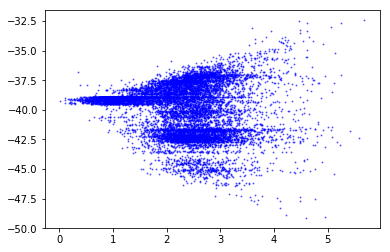

In [4]:
cleanQuakeData = pd.read_csv('clean-quake-data.csv', sep=',', header=0)

x = cleanQuakeData['magnitude']
y = cleanQuakeData['latitude']
colors = 'blue'
area = 1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

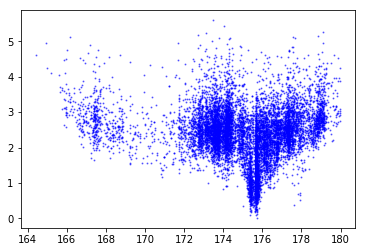

In [5]:
# longitude: 170 175 180 -175 -170
quakeToMap = cleanQuakeData[(cleanQuakeData.longitude > 100)]

x = quakeToMap['longitude']
y = quakeToMap['magnitude']
colors = 'blue'
area = 1

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

Anomalies in above graphs. Quakes up to magnitude 1 is located in narrow longitude and latitude area.
Let's look closer into that area.

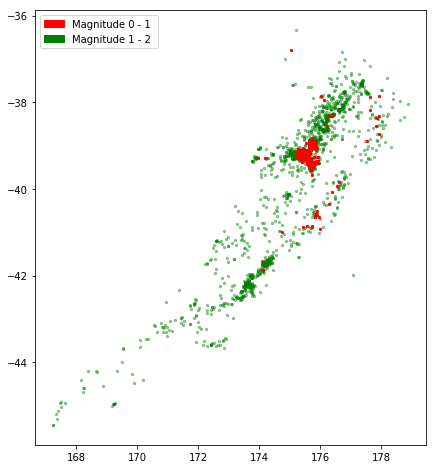

In [6]:
red_patch = mpatches.Patch(color='red', label='Magnitude 0 - 1 ')
green_patch = mpatches.Patch(color='green', label='Magnitude 1 - 2')



plt.figure(figsize=(7, 8))
area = 5

# ignore - longitude ??!
quakeToMap = cleanQuakeData[(cleanQuakeData.longitude > 100) & (cleanQuakeData.magnitudeRank == 1)]
color = 'green'

x = quakeToMap['longitude']
y = quakeToMap['latitude']

plt.scatter(x, y, s=area, c=color, alpha=0.4)


# ignore - longitude ??!
quakeToMap = cleanQuakeData[(cleanQuakeData.longitude > 100) & (cleanQuakeData.magnitudeRank == 0)]
color = 'red'

x = quakeToMap['longitude']
y = quakeToMap['latitude']

plt.scatter(x, y, s=area, c=color, alpha=1)

plt.legend(handles=[red_patch, green_patch], loc=2)

plt.show()

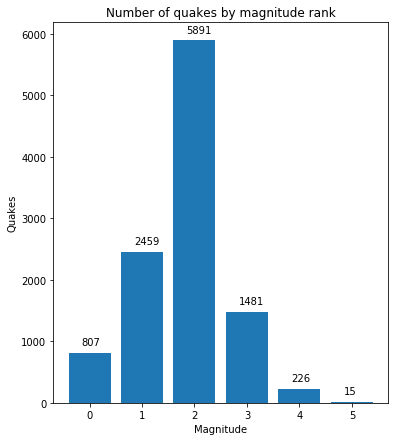

In [7]:
num = []
mag = []

for x in range(6):
    qStr = str(x) + ' <= magnitude < ' + str(x+1)
    part = cleanQuakeData.query(qStr)
    num.append(part.magnitude.count())
    mag.append(x)  

plt.figure(figsize=(6, 7))    
plt.title('Number of quakes by magnitude rank')
plt.xlabel('Magnitude')
plt.ylabel('Quakes')     

for a,b in zip(mag, num):
    plt.text(a-.15, b+125, str(b))
    
plt.bar(mag, num) 
plt.show()

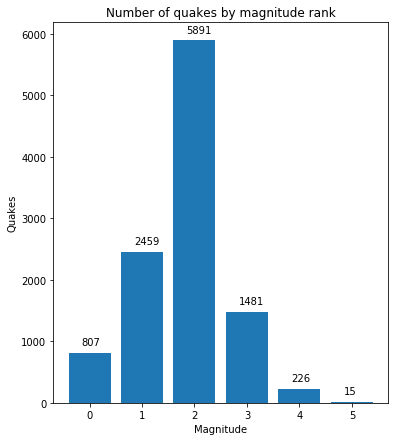

In [8]:
dfMagnitudeCount = cleanQuakeData.groupby('magnitudeRank')['magnitudeRank'].count().reset_index(name="count")

plt.figure(figsize=(6, 7))
plt.title('Number of quakes by magnitude rank')
plt.xlabel('Magnitude')
plt.ylabel('Quakes')

for a,b in zip(dfMagnitudeCount['magnitudeRank'], dfMagnitudeCount['count']):
    plt.text(a-.15, b+125, str(b))

plt.bar(dfMagnitudeCount['magnitudeRank'], dfMagnitudeCount['count'])
plt.show()

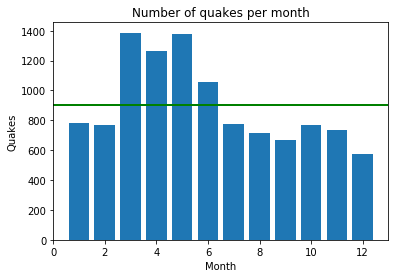

In [9]:
dfMonth = cleanQuakeData.groupby('month')['month'].count().reset_index(name="count")

meanPerMonth = int(dfMonth['count'].mean())

fig, ax = plt.subplots()
ax.axhline(y=meanPerMonth, color='green', linewidth=2)

plt.title('Number of quakes per month')
plt.xlabel('Month')
plt.ylabel('Quakes')

plt.bar(dfMonth['month'], dfMonth['count'])
plt.show()

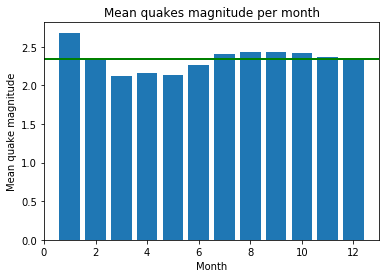

In [10]:
dfMagMonth = cleanQuakeData.groupby('month')['magnitude'].mean().reset_index(name="meanMag")

meanMagPerMonth = dfMagMonth['meanMag'].mean()

fig, ax = plt.subplots()
ax.axhline(y=meanMagPerMonth, color='green', linewidth=2)

plt.title('Mean quakes magnitude per month')
plt.xlabel('Month')
plt.ylabel('Mean quake magnitude')

plt.bar(dfMagMonth['month'], dfMagMonth['meanMag'])
plt.show()

In January and February number of quakes was lower but magnitude was higher than year mean.
In March, Aprli and May number of quakes was much higher (+40%) than in first two months but mean magnitude was lower than year mean.

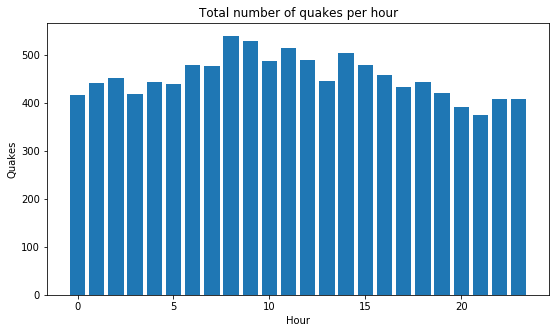

In [11]:
dfHours = cleanQuakeData.groupby('hour')['hour'].count().reset_index(name="count")

plt.figure(figsize=(9, 5))

plt.title('Total number of quakes per hour')
plt.xlabel('Hour')
plt.ylabel('Quakes')

plt.bar(dfHours['hour'], dfHours['count'])
plt.show()

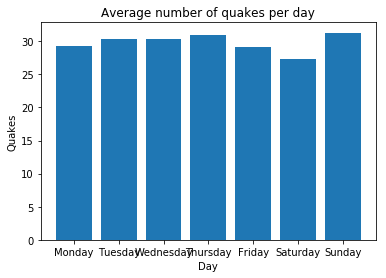

In [12]:

#names = cleanQuakeData['day'].unique()
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day = []
avg = []

for x in names:
    numOfQuakePerDay = cleanQuakeData[(cleanQuakeData.day == x)].day.count()
    numOfDays = cleanQuakeData[(cleanQuakeData.day == x)].date.unique().size

    avg.append(numOfQuakePerDay / numOfDays)
    day.append(x)
    
plt.title('Average number of quakes per day')
plt.xlabel('Day')
plt.ylabel('Quakes')

plt.bar(day, avg)
plt.show()   


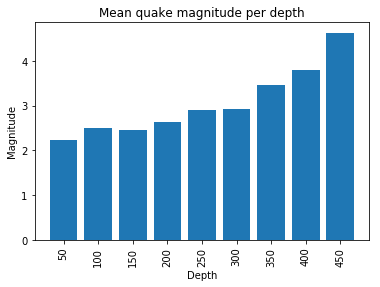

8


In [13]:
dfDepth = cleanQuakeData.groupby('depthRank')['magnitude'].mean().reset_index(name="count")

plt.title('Mean quake magnitude per depth')
plt.xlabel('Depth')
plt.ylabel('Magnitude')

labels = np.arange(50, 500, 50)
plt.xticks(dfDepth['depthRank'], labels, rotation='vertical')

plt.bar(dfDepth['depthRank'], dfDepth['count'])
plt.show()

print(cleanQuakeData.depthRank.max())

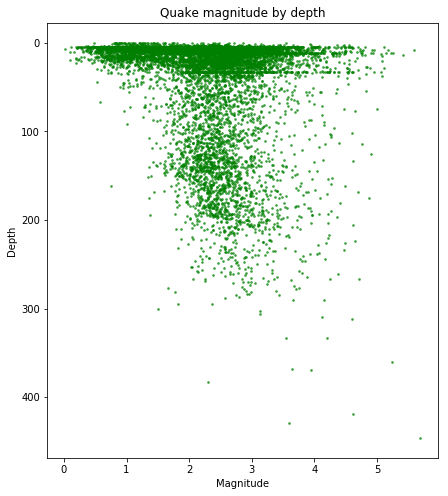

In [15]:
plt.figure(figsize=(7, 8))
area = 3

color = 'green'

x = cleanQuakeData['magnitude']
y = cleanQuakeData['depth']

plt.title('Quake magnitude by depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth')

plt.scatter(x, y, s=area, c=color, alpha=0.6)
plt.gca().invert_yaxis()

plt.show()

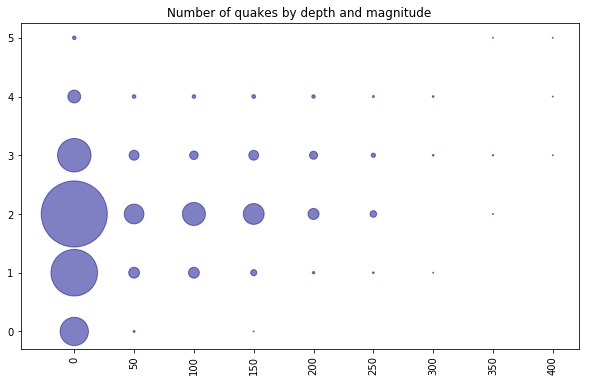

In [16]:

'''

heatData = []


sizeOf = dfHeatMap['depthRank'].nunique() - 1

for i in range(0, sizeOf):

    row = []
    
    for j in range (0, 6):
    
        rowD = dfHeatMap[(dfHeatMap.depthRank == i) & (dfHeatMap.magnitudeRank == j)]

        if len(rowD) == 0:
            row.insert( j, 0 )
        else:
            row.insert( j, int(rowD['count']) ) 


    heatData.insert( i, row)


plt.imshow(heatData, cmap='hot')
plt.show()    
    
                    
print(heatData)



'''




dfHeatMap = cleanQuakeData.groupby(['depthRank','magnitudeRank'])['magnitudeRank'].count().reset_index(name="dmCount")

colors = 'darkblue'
area = dfHeatMap.dmCount

labels = np.arange(0, 500, 50)

plt.figure(figsize=(10, 6))
plt.xticks(dfDepth['depthRank'], labels, rotation='vertical')
plt.title('Number of quakes by depth and magnitude')
plt.scatter(dfHeatMap.depthRank, dfHeatMap.magnitudeRank, s=area, c=colors, alpha=0.5)
plt.show()